# Prediction of BullDozer's price using Machine learning.

## Problem definition.

> How well can we predict the price of bulldozer based on its features and past records.

## Data.

> Data has provided mainly in three parts(Train, Valid, Test) on kaggle.

* https://www.kaggle.com/c/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set     throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 -   November 2012. Your score on the test set determines your final rank for the competition.

## Evaluation.

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted         auction prices.


## Features.

> Dictionary has been provided by kaggle which contains feature information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
%%HTML
<style type = 'text/css'>
table.dataframe th, table.dataframe td{
    border: 1px black solid !important;
    color: black !important;
}

#This code improves dataframe visual

In [3]:
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False)

# We have set low_memory = False as it was giving us warning of certain columns in data containing mixed data types.
# By doing so we remove restriction of RAM usage by dataframe.

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data exploration

In [12]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [14]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

#### This data can be classified as time series data.
> We will try to visualize saledate column

In [17]:
#fig, ax = plt.subplots()

#ax.scatter(df['saledate'][:100], df['SalePrice'][:100]);

#When we run this visualization we get messy plot which is overcrowded at X-axis

#### Parsing the date column

In [3]:
#For this we have to re-import the data with few different parameters

df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [37]:
df['saledate'][:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

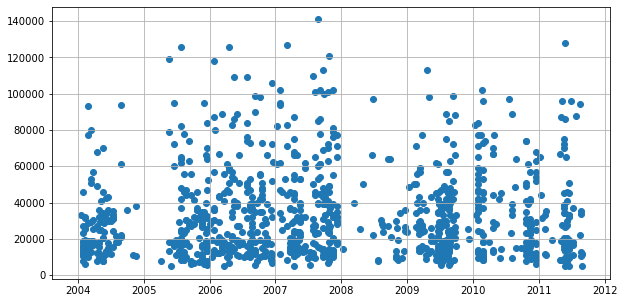

In [38]:
# We will try to visualize the above plot again as we have parsed the saledate column

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);
ax.grid()

In [39]:
# Just for better visual we will try to change to matplotlib style plots

In [33]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [46]:
plt.style.use('seaborn')

#### Sorting dataframe by saledate

* Its good idea to sort by date when we have time series data.

In [4]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [41]:
df['saledate'].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [58]:
df.head().T

,205615,114830,113547,54438,127000
SalesID,1646770,1451684,1449754,1301582,1474844
SalePrice,9500,23000,11000,24000,11250
MachineID,1126363,1434619,1486544,1199381,1279993
ModelID,8434,3854,3356,4123,7257
datasource,132,132,132,132,132
auctioneerID,18,99,99,18,99
YearMade,1974,1969,1967,1974,1979
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [5]:
df_tmp = df.copy()

In [8]:
# From now on we make changes to 'df_tmp' in order to preserve our original data from unrquired changes.

### Feature Engineering

* Creating new features(columns which are not target).
* We will be doing this with the help of existing columns.
* Particularly for this dataset we will try to harness saledate column and split in into new features.

In [13]:
new_features = ['SaleYear', 'SaleMonth', 'SaleDay', 'SaleDayOfWeek', 'SaleDayOfYear']
attr = ['year','month','day','dayofweek','dayofyear']

def create_features():
    
    for i in range(len(new_features)):
        
        df_tmp[new_features[i]] = getattr(df_tmp['saledate'].dt, attr[i])


In [7]:
create_features()

In [45]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Converting our data into numeric (String to numeric)

* We will be converting the string data type in our data-set into numeric data.
* In this case we will be using pandas category to encode our data.

In [42]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                401125 non-null  int64  
 1   SalesID                   401125 non-null  int64  
 2   SalePrice                 401125 non-null  int64  
 3   MachineID                 401125 non-null  int64  
 4   ModelID                   401125 non-null  int64  
 5   datasource                401125 non-null  int64  
 6   auctioneerID              380989 non-null  float64
 7   YearMade                  401125 non-null  int64  
 8   MachineHoursCurrentMeter  142765 non-null  float64
 9   UsageBand                 69639 non-null   object 
 10  saledate                  401125 non-null  object 
 11  fiModelDesc               401125 non-null  object 
 12  fiBaseModel               401125 non-null  object 
 13  fiSecondaryDesc           263934 non-null  o

In [43]:
pd.api.types.is_string_dtype(df_tmp['Steering_Controls'])

True

In [61]:
for labels, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(labels, end=' , ')

UsageBand , fiModelDesc , fiBaseModel , fiSecondaryDesc , fiModelSeries , fiModelDescriptor , ProductSize , fiProductClassDesc , state , ProductGroup , ProductGroupDesc , Drive_System , Enclosure , Forks , Pad_Type , Ride_Control , Stick , Transmission , Turbocharged , Blade_Extension , Blade_Width , Enclosure_Type , Engine_Horsepower , Hydraulics , Pushblock , Ripper , Scarifier , Tip_Control , Tire_Size , Coupler , Coupler_System , Grouser_Tracks , Hydraulics_Flow , Track_Type , Undercarriage_Pad_Width , Stick_Length , Thumb , Pattern_Changer , Grouser_Type , Backhoe_Mounting , Blade_Type , Travel_Controls , Differential_Type , Steering_Controls , 

In [8]:
#Encoding with pandas category feature

for labels, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[labels] = content.astype('category').cat.as_ordered()

In [63]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   category      
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  category      
 11  fiBaseModel               401125 non-null  category      
 12  fi

> All object type has been coverted into category

> Even though while viewing the dataframe we see string but under the hoods it has been encoded.


In [64]:
df_tmp.state.cat.codes[:5]

0     0
1    32
2    31
3    43
4    31
dtype: int8

In [65]:
df_tmp.state[:5]

0           Alabama
1    North Carolina
2          New York
3             Texas
4          New York
Name: state, dtype: category
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

> Exporting our current dataframe (df_tmp) in order to save the manipulated data.

In [47]:
df_tmp.to_csv("data/manipulated_df.csv",
              index = False)

In [3]:
df_tmp = pd.read_csv("data/manipulated_df.csv",
                     low_memory=False)

In [4]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Filling the missing data (Numeric)

* First we will be filling the numeric type data with fillna() method.
* We will fill it by median of the label as filling it with mean can be problematic as outlier can affect the range.

In [10]:
for label, content in df_tmp.items():
    
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [15]:
df_tmp['auctioneerID'].unique()

array([ 3.,  1.,  2., 11.,  4.,  7., 99.,  6.,  5., 18., 17., 22., 20.,
       14., 16., 21.,  9., 13., 12., 23., 10., 15., 19.,  8., 28., 25.,
       27., 24., nan,  0., 26.])

In [23]:
print("Unique values: ",df_tmp['MachineHoursCurrentMeter'].nunique())
print("Minimum Value: ", df_tmp['MachineHoursCurrentMeter'].min()) 
print("Max Value: ", df_tmp['MachineHoursCurrentMeter'].max())

Unique values:  15152
Minimum Value:  0.0
Max Value:  2483300.0


In [5]:
for label, content in df_tmp.items():
    
    if pd.api.types.is_numeric_dtype(content):
        
        if pd.isnull(content).sum():
            
            df_tmp[label+'is_missing'] = pd.isnull(content)
            
            df_tmp[label] = content.fillna(content.median())

In [51]:
for label, content in df_tmp.items():
    
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label) # It prints nothing as we dont have any null value in numeric columns

In [6]:
df_tmp['auctioneerID'].isnull().sum()

0

In [7]:
df_tmp['MachineHoursCurrentMeter'].isnull().sum()

0

### Filling categorical data and coverting it to numeric

In [11]:
for label, content in df_tmp.items():
    
    if not pd.api.types.is_numeric_dtype(content):
        print(label, end=" , ")

UsageBand , saledate , fiModelDesc , fiBaseModel , fiSecondaryDesc , fiModelSeries , fiModelDescriptor , ProductSize , fiProductClassDesc , state , ProductGroup , ProductGroupDesc , Drive_System , Enclosure , Forks , Pad_Type , Ride_Control , Stick , Transmission , Turbocharged , Blade_Extension , Blade_Width , Enclosure_Type , Engine_Horsepower , Hydraulics , Pushblock , Ripper , Scarifier , Tip_Control , Tire_Size , Coupler , Coupler_System , Grouser_Tracks , Hydraulics_Flow , Track_Type , Undercarriage_Pad_Width , Stick_Length , Thumb , Pattern_Changer , Grouser_Type , Backhoe_Mounting , Blade_Type , Travel_Controls , Differential_Type , Steering_Controls , 

In [6]:
for label, content in df_tmp.items():
    
    
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label + '_is_missing'] = pd.isnull(content)
        
        # Turning categories in numbers and add 1
        # We are adding 1 as in categorical column the missing value have code of -1 which will become 0 and we wont have any negative values.
        
        df_tmp[label] = pd.Categorical(content).codes + 1

In [13]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Columns: 105 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(47), float64(2), int16(5), int64(11), int8(40)
memory usage: 76.9 MB


In [16]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=105)

In [12]:
### Fitting the data to model(RandomForestregressor) 

from sklearn.ensemble import RandomForestRegressor

model  = RandomForestRegressor(n_jobs=-1,
                               random_state=12)

X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp["SalePrice"]

In [85]:
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

In [28]:
model.score(X, y)

0.9878858984101488

### Splitting the Data (Train + Valid)

* We will split our data into two sets (Train & Valid)  w.r.t SaleYear as per given instruction on Kaggle.
* Train set -: Sale before 2012
* Validation set -: Sale in 2012
    


In [7]:
df_train = df_tmp[df_tmp['SaleYear'] != 2012]
df_valid = df_tmp[df_tmp['SaleYear'] == 2012]

In [55]:
print(df_train.shape, df_valid.shape)

(11573, 105) (401125, 105)


In [8]:
X_train, y_train = df_train.drop('SaleYear', axis=1), df_train['SaleYear']

X_valid, y_valid = df_valid.drop('SaleYear', axis=1), df_valid['SaleYear']

In [31]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(401125, 104) (401125,)
(11573, 104) (11573,)


> Even though we have splitted the data we might have done an error in the process. We filled the whole data first before splitting it which means that for filling the missing value in validation set we might have used the data present in Train set. This is considered as mistake since we violates the generalization of our model.

### Creating custom evaluation function

* Since we got this data from kaggle's competition the evaluation required by the competition organisers is root-mean-squared-log-error.

* We will create this evaluation on top on sklearn's mean-squared-log-error metric

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_true, y_preds):
    
    """
    Calculates root_mean_squared_log_error
    
    """
    
    return np.sqrt(mean_squared_log_error(y_true, y_preds))
    
def show_scores(model):
    
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = {"root_mean_squared_log_error_train": rmsle(y_train, train_preds),
              "root_mean_squared_log_error_valid": rmsle(y_valid, valid_preds),
             
             "mean_absolute_error_train": mean_absolute_error(y_train, train_preds),
             "mean_absolute_error_valid": mean_absolute_error(y_valid, valid_preds),
             
             "R^2 score_train": r2_score(y_train, train_preds),
             "R^2 score_valid": r2_score(y_valid, valid_preds)}
    
    
    return scores

### Reducing data 

* Despite the title we wont be actually reducing data but we would be training our model on subset of our original data.
* We are doing this in order to reduce time for training our model.
* There are two possible ways of doing this(subset of data):
    1. Dataframe slicing
    2. Parameter tuning of our model (For RandomForestRegressor- max_samples)

In [32]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=12,
                              max_samples=10000);


In [33]:
%%time 

model.fit(X_train, y_train)

Wall time: 23.6 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

In [34]:
show_scores(model)

{'root_mean_squared_log_error_train': 6.499403386164121e-06,
 'root_mean_squared_log_error_valid': 0.0004968944201610981,
 'mean_absolute_error_train': 0.0006141726394514743,
 'mean_absolute_error_valid': 1.0,
 'R^2 score_train': 0.9999948883481199,
 'R^2 score_valid': 0.0}

### Hyperparameter Tuning with RandomizedSearchCV

In [39]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1.0, 'sqrt', 'auto'],
           "max_samples": [10000]}


rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs= -1,
                                                    random_state=12),
                             param_distributions = rf_grid,
                             cv = 5,
                             verbose = True,
                             n_iter = 2)


rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.7min finished


Wall time: 5min


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [40]:
show_scores(rs_model)

{'root_mean_squared_log_error_train': 0.00030149976667705723,
 'root_mean_squared_log_error_valid': 0.0006191131890094982,
 'mean_absolute_error_train': 0.3727751224900196,
 'mean_absolute_error_valid': 1.204914605288839,
 'R^2 score_train': 0.9889936361741253,
 'R^2 score_valid': 0.0}

#### Ideal model (For which Daniel did RandomizedSearchCV with `n_esimators` = 100)

* Following are the best parameters obtained from his search.

In [10]:
%%time

from sklearn.ensemble import RandomForestRegressor

ideal_model = RandomForestRegressor(n_estimators = 100,
                                    min_samples_leaf = 1,
                                    min_samples_split = 14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None,
                                    random_state = 12)

ideal_model.fit(X_train, y_train) #We are training one complete training dataset

Wall time: 3min 22s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

In [11]:
show_scores(ideal_model)

{'root_mean_squared_log_error_train': 3.4073677017944104e-06,
 'root_mean_squared_log_error_valid': 0.0004977585928957476,
 'mean_absolute_error_train': 0.001630111355707565,
 'mean_absolute_error_valid': 1.0017237578634501,
 'R^2 score_train': 0.999998597028605,
 'R^2 score_valid': 0.0}

### Preprocessing the Test data

* In order to get result from test data we have to convert it into same form in which our model has been trained.

In [117]:
def preprocess_data(df):
    
    #Creating columns from saledate column
    new_features = ['SaleYear', 'SaleMonth', 'SaleDay', 'SaleDayOfWeek', 'SaleDayOfYear']
    attr = ['year','month','day','dayofweek','dayofyear']

    for i in range(len(new_features)):
        df[new_features[i]] = getattr(df['saledate'].dt, attr[i])
    
    #Converting object dtype into categorical dtype
    for labels, content in df_tmp.items():
        
        if pd.api.types.is_string_dtype(content):
            df[labels] = content.astype('category').cat.as_ordered()
        
    #Filling data (numeric)
    for label, content in df.items():
    
        if pd.api.types.is_numeric_dtype(content):
        
            if pd.isnull(content).sum():
                df[label+'is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
            
    #Filling data (categorical) + Converting it to numeric
    for label, content in df.items():
    
        if not pd.api.types.is_numeric_dtype(content):
            df[label + '_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
        
    return df

In [116]:
df_test = pd.read_csv('data/Test.csv',
                      low_memory=False,
                      parse_dates = ['saledate'])

In [26]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [118]:
preprocess_data(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,126,713,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,126,186,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,126,325,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,126,325,...,False,False,False,False,False,True,True,True,True,True


In [121]:
set(X_train.columns) - set(df_test.columns)

{'SalePrice', 'auctioneerIDis_missing'}

In [123]:
#Manually adding a column
df_test['auctioneerIDis_missing'] = False

In [124]:
X_train.shape

(401125, 104)

In [125]:
df_test.shape

(12457, 104)

In [126]:
test_preds = ideal_model.predict(df_test)

In [127]:
test_preds

array([1995.17880901, 1997.05961845, 1998.73880556, ..., 1996.29787068,
       1996.29787068, 1996.86360526])

In [128]:
# Creating final result in format required by Kaggle

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds

In [129]:
df_preds.head()

,SalesID,SalePrice
0,1227829,1995.178809
1,1227844,1997.059618
2,1227847,1998.738806
3,1227848,1994.117473
4,1227863,1995.775551


### Feature importance (To determine which feature contribute most in order to predict `Target` variable)

In [131]:
#Rfr has method to determine feature importance

ideal_model.feature_importances_

array([6.34909453e-02, 2.67034691e-04, 5.69986937e-04, 1.66995594e-03,
       2.77076550e-02, 7.01286815e-04, 4.95652052e-02, 2.34612931e-03,
       7.47792022e-05, 7.35961468e-01, 1.15648370e-04, 7.67665419e-05,
       8.78364440e-04, 1.34835226e-04, 3.97926341e-05, 5.40180852e-06,
       1.30674944e-04, 8.96495192e-05, 1.18768181e-05, 3.23458281e-06,
       2.46813623e-06, 1.01267080e-05, 5.26278700e-07, 1.08920580e-06,
       3.68095830e-06, 1.83297079e-06, 1.80890243e-04, 3.49666844e-07,
       8.29286565e-07, 6.00923637e-06, 4.65514451e-06, 6.19097494e-08,
       6.32080557e-04, 1.64846602e-07, 6.35751228e-05, 3.74265955e-06,
       1.04887891e-04, 6.97157479e-05, 7.78638700e-06, 7.12772572e-06,
       1.93857577e-05, 7.80017847e-06, 1.32832821e-06, 1.60883790e-06,
       1.06093391e-06, 7.69814350e-07, 6.74752231e-08, 2.64809910e-06,
       8.58494515e-08, 1.28791038e-06, 4.93705197e-07, 1.61900487e-07,
       9.26184480e-08, 7.50099637e-05, 1.29876316e-04, 3.34636685e-04,
      

In [134]:
#We will create function for visual represtation of above array with respect to features

def plot_feature_imp(columns, importances, n=20):
    
    df = (pd.DataFrame({'Features': columns,
                        'Feature_importance': importances}))
    
    df = df.sort_values('Feature_importance',ascending=False)
    df = df.reset_index(drop=True)
    
    #PLotting above created dataframe
    fig, ax = plt.subplots()
    ax.barh(df['Features'][:n], df['Feature_importance'][:n])
    
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

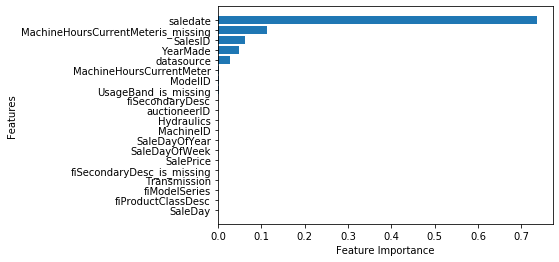

In [135]:
plot_feature_imp(X_train.columns, ideal_model.feature_importances_)

## Conclusions

- These conclusions are made by following along the project.

1. Data exploration and EDA could have been more elaborative but for essence of time we have been limited ourselves for optimal EDA & data exploration.

2. Data manipulation has been done with the help of pandas for tasks such as (Coverting into numeric, filling null values, etc).

3. We used only one model(RandomForestRegressor) for our modelling process.

4. Three evaluation metrics were used:-
    1. MAE (Mean absolute error)
    2. RMSLE (Root mean squared log error)
    3. R^2 scoring method.

5. Results we obtained from our evaluation were indicating that our model has overfitted. This might have occured due to filling the data before splitting it.

6. This project is done while educating process and has ample of areas in which improvements can be done. Here we conclude the Milestone Project 2.